In [18]:
import pandas as pd
import numpy as np
import random as rand

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from fancyimpute import IterativeImputer

In [19]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
combine = [train, test]

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Above is to make sure the Train datatset was imported correctly

In [21]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

As shown in class, there were some Null values, which would be insignificant when analyzing the data. I will try to see what I can do with the Null cells.

In [22]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

Even the test dataset contains the null cells.

In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To find out the negligible data, I will identify the unique sets as unique data will not have any correlation to the survival

In [24]:
uniqueCol = []
for i in train:
    if train[i].count() == len(train[i].unique()):
        print(i)


PassengerId
Name


In [25]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The Name column is hard to work with due to its format. I will drop the column and use the Passenger ID column as my row index.

In [26]:
train.drop(columns=['Name'], inplace=True)
train.set_index(keys=['PassengerId'], drop=True, inplace=True)

test.drop(columns=['Name'], inplace=True)
test.set_index(keys=['PassengerId'], drop=True, inplace=True)

In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Now the Name column is gone, and passenger Id column serves as a row index, we will do some analysis of the data.
From the isnull function, we know that there are three columns that contain null values. Since the test tables also contained them, I will try to leave them as-is for now and try to focus on the non-null columns.
Age             True
Cabin           True
Embarked        True
dtype: bool

In [28]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [29]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [30]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Non-null columns are analyzed above. As you can see, there are somewhat relationship. Now we are going to look into treating the columns with null values.

In [32]:
concatData = pd.concat(objs=[train.drop(columns=['Survived']),test], axis=0)

In [33]:
concatData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


You can see above that a chunk of data are missing in certain columns. I will try to see if I should remove the columns

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000


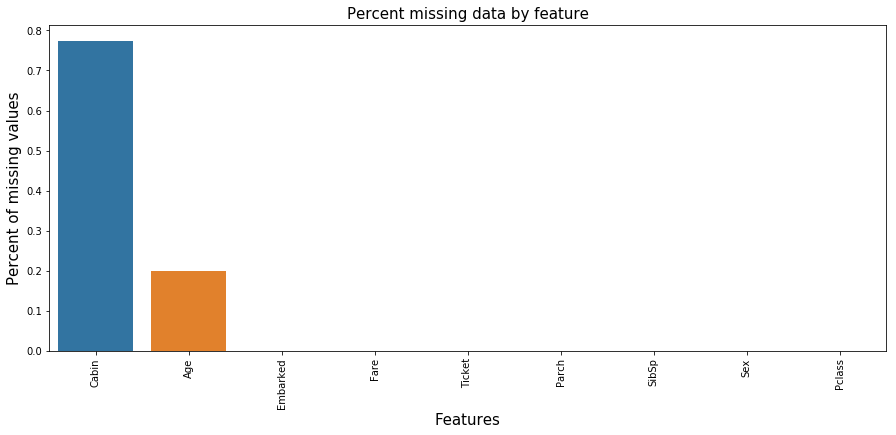

In [34]:
total = concatData.isnull().sum().sort_values(ascending=False)
percent = (concatData.isnull().sum()/concatData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

From the above graph, we can tell that Cabin data is not worth messing with. I will remove the Cabin column, and will try to deal with the Age column. For Embarked and Fare, I will remove the rows with the missing data as it is only 3 rows out of the original 891.

In [35]:
train.drop(columns='Cabin', inplace=True)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [37]:
solver = IterativeImputer(n_iter=5, sample_posterior=True, random_state=1)

In [38]:
columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2}, 'Sex': {'male': 0, 'female': 1}}
train.replace(columns_map, inplace=True)

In [39]:
test.replace(columns_map,inplace =True)

In [40]:
test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,1
893,3,1,47.0,1,0,363272,7.0000,NaN,2
894,2,0,62.0,0,0,240276,9.6875,NaN,1
895,3,0,27.0,0,0,315154,8.6625,NaN,2
896,3,1,22.0,1,1,3101298,12.2875,NaN,2
897,3,0,14.0,0,0,7538,9.2250,NaN,2
898,3,1,30.0,0,0,330972,7.6292,NaN,1
899,2,0,26.0,1,1,248738,29.0000,NaN,2
900,3,1,18.0,0,0,2657,7.2292,NaN,0


In [41]:
train.drop(columns=['Ticket'],inplace = True)

In [42]:
test.drop(columns=['Ticket','Cabin'], inplace=True)

In [43]:
trainImpute = train

In [44]:
trainImpute

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2.0
2,1,1,1,38.0,1,0,71.2833,0.0
3,1,3,1,26.0,0,0,7.9250,2.0
4,1,1,1,35.0,1,0,53.1000,2.0
5,0,3,0,35.0,0,0,8.0500,2.0
6,0,3,0,NaN,0,0,8.4583,1.0
7,0,1,0,54.0,0,0,51.8625,2.0
8,0,3,0,2.0,3,1,21.0750,2.0
9,1,3,1,27.0,0,2,11.1333,2.0


In [45]:
TrainX= solver.fit_transform(trainImpute)

In [46]:
TrainX

array([[ 0.    ,  3.    ,  0.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    ,  1.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 0.    ,  3.    ,  1.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  3.    ,  0.    , ...,  0.    ,  7.75  ,  1.    ]])

In [107]:
TestX = solver.fit_transform(test)

In [109]:
TestXdf = pd.DataFrame(TestX, index=test.index)

In [111]:
TestXdf

,0,1,2,3,4,5,6
PassengerId,,,,,,,
892,3.0,0.0,34.500000,0.0,0.0,7.8292,1.0
893,3.0,1.0,47.000000,1.0,0.0,7.0000,2.0
894,2.0,0.0,62.000000,0.0,0.0,9.6875,1.0
895,3.0,0.0,27.000000,0.0,0.0,8.6625,2.0
896,3.0,1.0,22.000000,1.0,1.0,12.2875,2.0
897,3.0,0.0,14.000000,0.0,0.0,9.2250,2.0
898,3.0,1.0,30.000000,0.0,0.0,7.6292,1.0
899,2.0,0.0,26.000000,1.0,1.0,29.0000,2.0
900,3.0,1.0,18.000000,0.0,0.0,7.2292,0.0


In [47]:
trainXdf=pd.DataFrame(TrainX, index=train.index)

In [100]:
trainXdf.rename(columns={trainXdf.columns[0]:'Survived',trainXdf.columns[1]:'PClass',trainXdf.columns[2]: 'Sex', trainXdf.columns[3]: 'Age',trainXdf.columns[4]: 'SibSp',trainXdf.columns[5]: 'Parch',trainXdf.columns[6]: 'Fare',trainXdf.columns[7]: 'Embarked'})

,Survived,PClass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3.0,0.0,22.000000,1.0,0.0,7.2500,2.0
2,1.0,1.0,1.0,38.000000,1.0,0.0,71.2833,0.0
3,1.0,3.0,1.0,26.000000,0.0,0.0,7.9250,2.0
4,1.0,1.0,1.0,35.000000,1.0,0.0,53.1000,2.0
5,0.0,3.0,0.0,35.000000,0.0,0.0,8.0500,2.0
6,0.0,3.0,0.0,24.740230,0.0,0.0,8.4583,1.0
7,0.0,1.0,0.0,54.000000,0.0,0.0,51.8625,2.0
8,0.0,3.0,0.0,2.000000,3.0,1.0,21.0750,2.0
9,1.0,3.0,1.0,27.000000,0.0,2.0,11.1333,2.0


In [101]:
trainXdf

,0,1,2,3,4,5,6,7
PassengerId,,,,,,,,
1,0.0,3.0,0.0,22.000000,1.0,0.0,7.2500,2.0
2,1.0,1.0,1.0,38.000000,1.0,0.0,71.2833,0.0
3,1.0,3.0,1.0,26.000000,0.0,0.0,7.9250,2.0
4,1.0,1.0,1.0,35.000000,1.0,0.0,53.1000,2.0
5,0.0,3.0,0.0,35.000000,0.0,0.0,8.0500,2.0
6,0.0,3.0,0.0,24.740230,0.0,0.0,8.4583,1.0
7,0.0,1.0,0.0,54.000000,0.0,0.0,51.8625,2.0
8,0.0,3.0,0.0,2.000000,3.0,1.0,21.0750,2.0
9,1.0,3.0,1.0,27.000000,0.0,2.0,11.1333,2.0


In [179]:
X_train = trainXdf.drop(columns=[0])
Y_train = trainXdf[0]

In [180]:
xtr,xte,ytr,yte = train_test_split(X_train, Y_train, test_size=0.33, random_state=10)

In [177]:
xte

,1,2,3,4,5,6,7
PassengerId,,,,,,,
591,3.0,0.0,35.000000,0.0,0.0,7.1250,2.0
132,3.0,0.0,20.000000,0.0,0.0,7.0500,2.0
629,3.0,0.0,26.000000,0.0,0.0,7.8958,2.0
196,1.0,1.0,58.000000,0.0,0.0,146.5208,0.0
231,1.0,1.0,35.000000,1.0,0.0,83.4750,2.0
647,3.0,0.0,19.000000,0.0,0.0,7.8958,2.0
76,3.0,0.0,25.000000,0.0,0.0,7.6500,2.0
587,2.0,0.0,47.000000,0.0,0.0,15.0000,2.0
570,3.0,0.0,32.000000,0.0,0.0,7.8542,2.0


In [204]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train.values, Y_train.values)
print(random_forest.score(xte.values, yte.values))
ypr = random_forest.predict(xte.values)
ytru=yte.values
submit=random_forest.predict(TestXdf).astype(int)

0.9898305084745763


In [158]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.01

In [185]:
tn, fp, fn, tp = confusion_matrix(ytru, ypr).ravel()
print("Confusion Matrix")
print(confusion_matrix(ytru, ypr, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[190   1]
 [  2 102]]

True Negatives 190
False Positives 1
False Negatives 2
True Positives 102


In [197]:
submission = pd.DataFrame({
        "PassengerId": test.index,
        "Survived": submit
    })

In [198]:
submission.set_index(keys=['PassengerId'], drop=True, inplace=True)

In [199]:
submission.to_csv('predictions3.csv', header=True, sep=',')